# Taller I: Speech Characterization

En este taller la idea es que generen un notebook de Jupyter donde obtengan una sñal devoz, a partir del microfono de su computador, en donde deben decir las vocales. Esta señal debe ser procesada utilizando el espectrograma, y el Me-Spectrograma para obtener una caracterización de los fonemas de las vocales.

Por medio de procesamiento del espectrograma deberan identificar los intervalos donde se pronunci un fonema, y realizar una grafica de la firma espectral de ese fonema junto con su desviación estandar.

Para realizar la obtención de la señal de voz pueden utulizar el paquete *sounddevice* de python. Las funciones para el espectrograma y el mel-spectrograma pueden encontrarlas en diferentes librerias de python, no es necesario qu elas implementen.

Para ayudar a guiar el desarrollo del taller, les adjunto un código en Matlab que reliza estas funciones.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import scipy as sc
from scipy import signal
from scipy.fft import fftshift

import librosa
import librosa.display

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import soundfile as sf
%matplotlib notebook

In [6]:
# Setting the interface to acquire audio data
fs = 8000 # frecuencia de muestreo
nBits = 16
nChannels = 1
ID = -1
seconds = 5 # Duracion de la grabacion
"""
print("Grabando...")
y = sd.rec(int(seconds * fs), samplerate=fs, channels=nChannels)
sd.wait()  # Wait until recording is finished
sf.write('output.wav', y, fs)  # Save as WAV file
print("Terminado")"""

'\nprint("Grabando...")\ny = sd.rec(int(seconds * fs), samplerate=fs, channels=nChannels)\nsd.wait()  # Wait until recording is finished\nsf.write(\'output.wav\', y, fs)  # Save as WAV file\nprint("Terminado")'

In [7]:
y_aux, fs_aux = sf.read('output.wav') # mono signal


In [9]:
y = ((1/np.std(y_aux))*y_aux).reshape(len(y_aux))

<IPython.core.display.Javascript object>


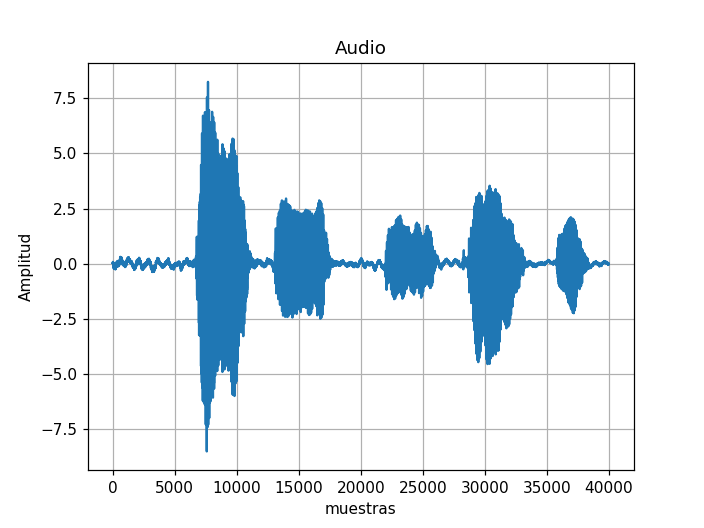

In [10]:
plt.plot(y)
plt.title("Audio")
plt.xlabel("muestras")
plt.ylabel("Amplitud")
plt.grid(True)

In [11]:
sd.play(y,fs)

In [12]:
len_win = np.fix(0.02*fs) #Defining the samples for a 20ms window
wind = np.hanning(len_win) # Computing the window length to compute the spectrogram.
len_over = np.fix(0.01*fs) # Defining number of samples for an overlap of 10ms between consecutive windows.
Nfft = 512 # Number of points for the FFT

In [13]:
f,t,Syy = signal.spectrogram(y,fs,window=wind, nperseg=len_win,noverlap=len_over,nfft=Nfft)

In [14]:
Sw = np.abs(Syy) # calculando el val. absoluto del spectrograma
F = f.reshape(len(f),1) @ np.ones([1,len(t)]) # matriz de frecuencias
T = np.ones([len(f),1]) @ t.reshape(1,len(t)) # matriz de tiempos

<IPython.core.display.Javascript object>


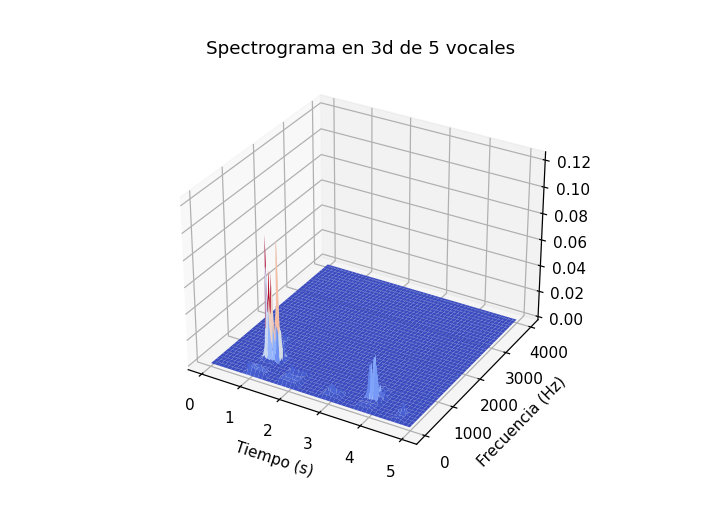

In [15]:
# Grafica de spectrogramas
fig = plt.figure()
ax = fig.gca(projection="3d")

surf = ax.plot_surface(T,F,Syy,cmap=cm.coolwarm)
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Hz)")
#plt.zlabel("Intensidad") # revisar
plt.title("Spectrograma en 3d de 5 vocales")
plt.show()

In [16]:
# Calculo de Mel-Spectograma
# http://man.hubwiz.com/docset/LibROSA.docset/Contents/Resources/Documents/generated/librosa.feature.melspectrogram.html
#Sm = librosa.feature.melspectrogram(y=y, sr=fs, S=Syy, n_fft=Nfft)
Sm = librosa.feature.melspectrogram(y=y, sr=fs, n_fft=Nfft)

In [17]:
fm = np.arange(0, Nfft / 4) * fs / Nfft  # Se divide entre 4 para que quede la misma cantidad de frecuencias.

<IPython.core.display.Javascript object>


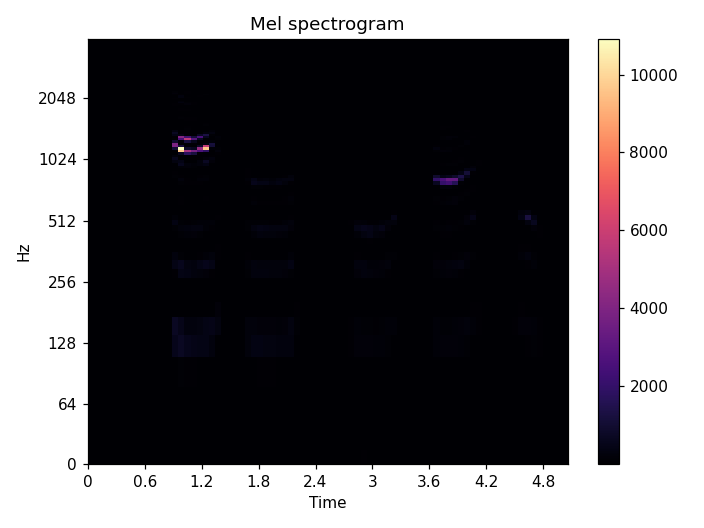

C:\Users\juanc\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\juanc\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\juanc\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


In [18]:
fig=plt.figure()
#librosa.display.specshow(Sm,y_axis='mel',x_axis='time')
librosa.display.specshow(Sm, sr=fs, hop_length=Nfft, x_axis='time', y_axis='log')
plt.colorbar() #Confirmar unidad
plt.title("Mel spectrogram")
plt.tight_layout()

In [19]:
# Detectando cambios en los fonemas
# con el spectrograma
# NOTA: La diferencia es entre frecuencias o isntantes?
D_Sw = np.sqrt(np.sum((Sw[:,1:] - Sw[:,0:-1])**2,axis=0))
# con el Mel-Spectrograma
D_Sm = np.sqrt(np.sum((Sm[:,1:] - Sm[:,0:-1])**2,axis=0))

In [20]:
D_Sw.shape

(498,)

<IPython.core.display.Javascript object>


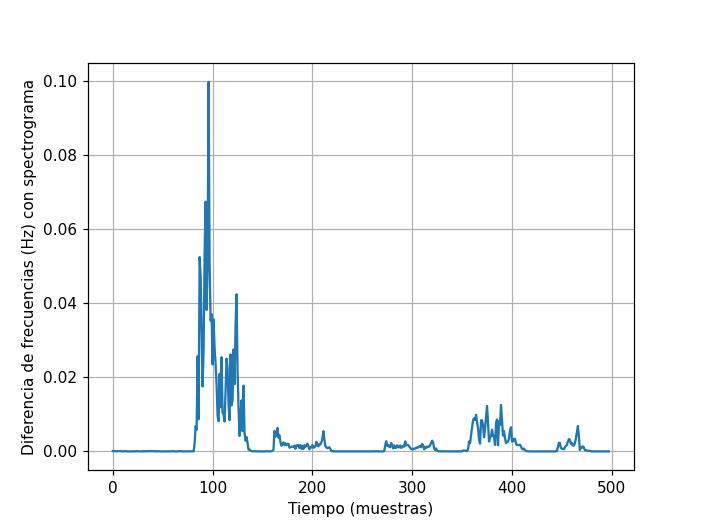

In [21]:
fig = plt.figure()
plt.grid(True)
plt.xlabel("Tiempo (muestras)")
plt.ylabel("Diferencia de frecuencias (Hz) con spectrograma") # REVISAR
plt.plot(D_Sw);

In [22]:
a_s = np.array(range(80,136))
e_s = np.array(range(161,220))
i_s = np.array(range(272,324))
o_s = np.array(range(355,412))
u_s = np.array(range(444,475))

<IPython.core.display.Javascript object>


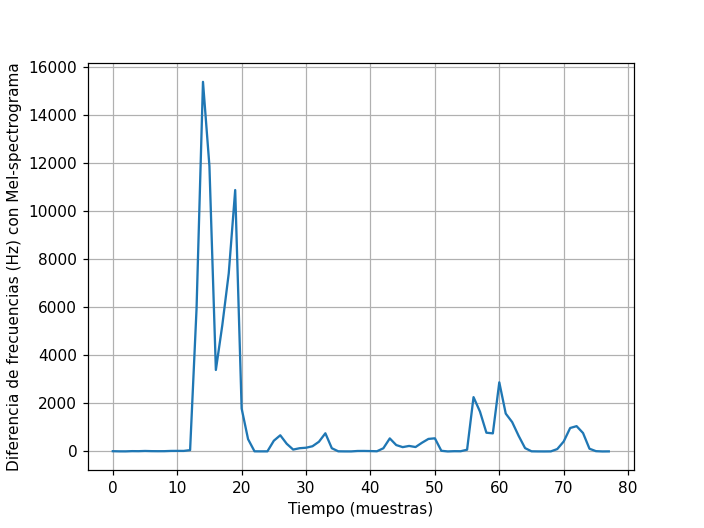

In [23]:
# Graficando con Mel-Spectrograma
fig = plt.figure()
plt.grid(True)
plt.xlabel("Tiempo (muestras)")
plt.ylabel("Diferencia de frecuencias (Hz) con Mel-spectrograma") # REVISAR
plt.plot(D_Sm);

In [24]:
a_m = np.array(range(12,22))
e_m = np.array(range(24,36))
i_m = np.array(range(40,51))
o_m = np.array(range(54,65))
u_m = np.array(range(68,75))

<IPython.core.display.Javascript object>


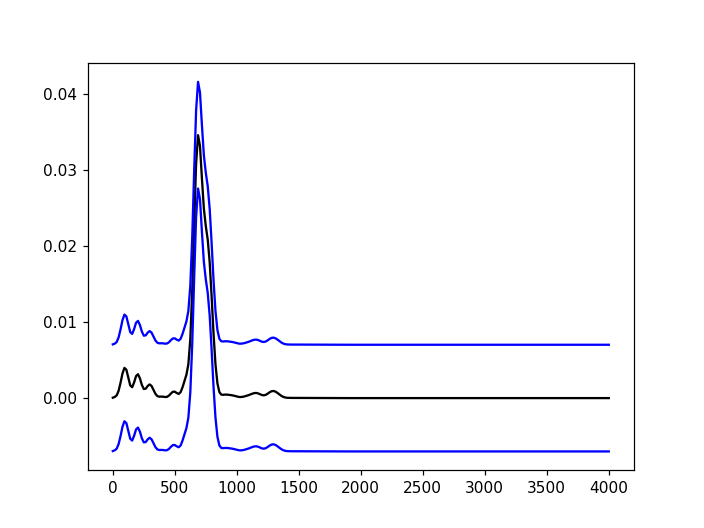

In [25]:
# plots de cada señal de los diferentes fonemas usando
# el spectrograma
fig = plt.figure()
#plt.subplots(nrows=1,ncols=1)
plt.plot(f,np.mean(Sw[:,a_s+1],axis=1),color='k')# REVISAR
plt.plot(f,np.mean(Sw[:,a_s+1],axis=1)+np.std(Sw[:,a_s+1]),color='b')# REVISAR
plt.plot(f,np.mean(Sw[:,a_s+1],axis=1)-np.std(Sw[:,a_s+1]),color='b')

<IPython.core.display.Javascript object>


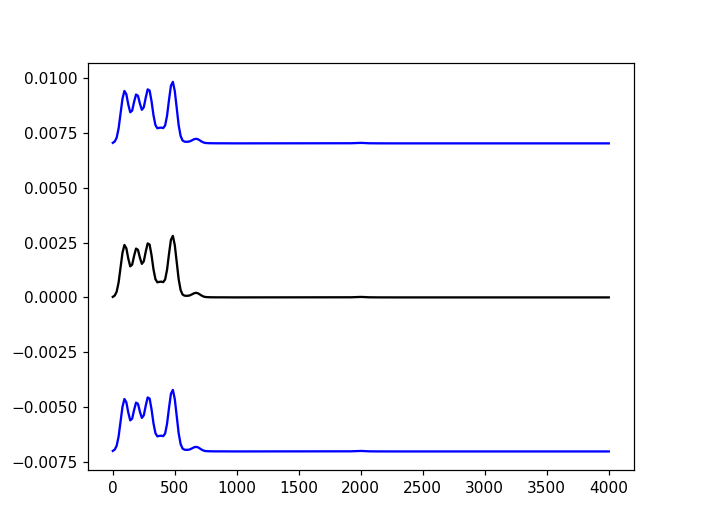

In [26]:
fig = plt.figure()
#plt.subplots(nrows=1,ncols=1)
plt.plot(f,np.mean(Sw[:,e_s+1],axis=1),color='k')# REVISAR
plt.plot(f,np.mean(Sw[:,e_s+1],axis=1)+np.std(Sw[:,a_s+1]),color='b')# REVISAR
plt.plot(f,np.mean(Sw[:,e_s+1],axis=1)-np.std(Sw[:,a_s+1]),color='b')

<IPython.core.display.Javascript object>


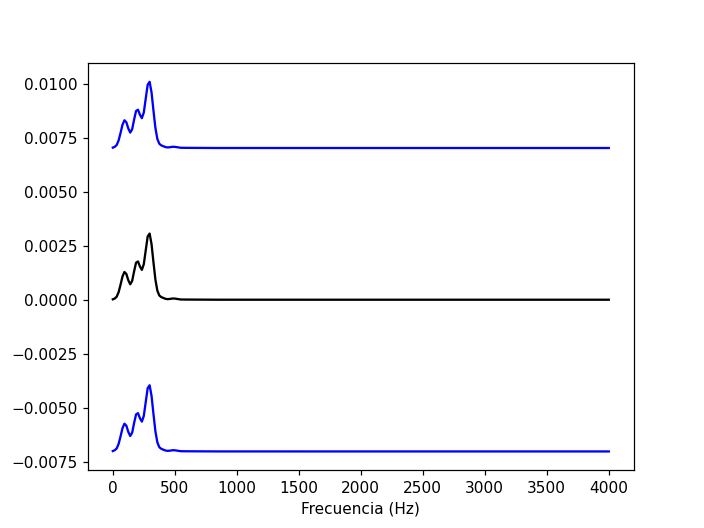

Text(0.5, 0, 'Frecuencia (Hz)')

In [33]:
fig = plt.figure()
#plt.subplots(nrows=1,ncols=1)
plt.plot(f,np.mean(Sw[:,i_s+1],axis=1),color='k')# REVISAR
plt.plot(f,np.mean(Sw[:,i_s+1],axis=1)+np.std(Sw[:,a_s+1]),color='b')# REVISAR
plt.plot(f,np.mean(Sw[:,i_s+1],axis=1)-np.std(Sw[:,a_s+1]),color='b')
plt.xlabel("Frecuencia (Hz)")

<IPython.core.display.Javascript object>


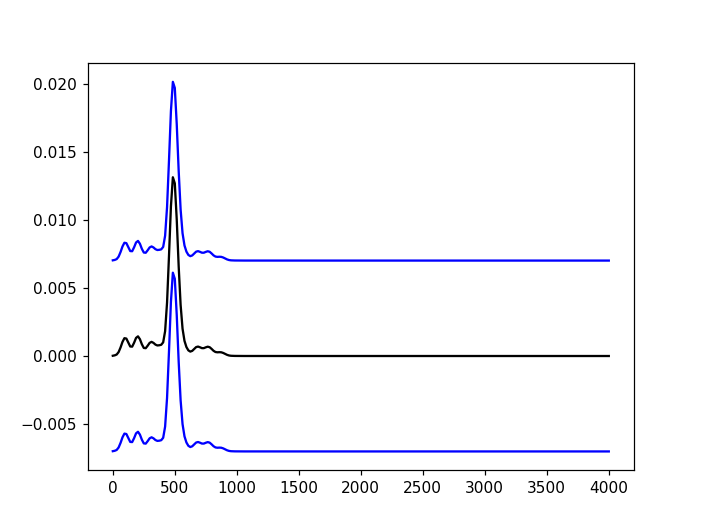

In [28]:
fig = plt.figure()
#plt.subplots(nrows=1,ncols=1)
plt.plot(f,np.mean(Sw[:,o_s+1],axis=1),color='k')# REVISAR
plt.plot(f,np.mean(Sw[:,o_s+1],axis=1)+np.std(Sw[:,a_s+1]),color='b')# REVISAR
plt.plot(f,np.mean(Sw[:,o_s+1],axis=1)-np.std(Sw[:,a_s+1]),color='b')

<IPython.core.display.Javascript object>


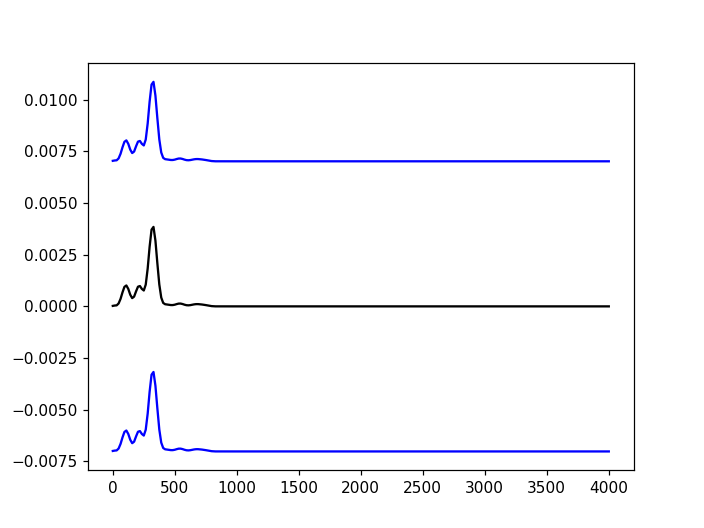

In [29]:
fig = plt.figure()
#plt.subplots(nrows=1,ncols=1)
plt.plot(f,np.mean(Sw[:,u_s+1],axis=1),color='k')# REVISAR
plt.plot(f,np.mean(Sw[:,u_s+1],axis=1)+np.std(Sw[:,a_s+1]),color='b')# REVISAR
plt.plot(f,np.mean(Sw[:,u_s+1],axis=1)-np.std(Sw[:,a_s+1]),color='b')

<IPython.core.display.Javascript object>


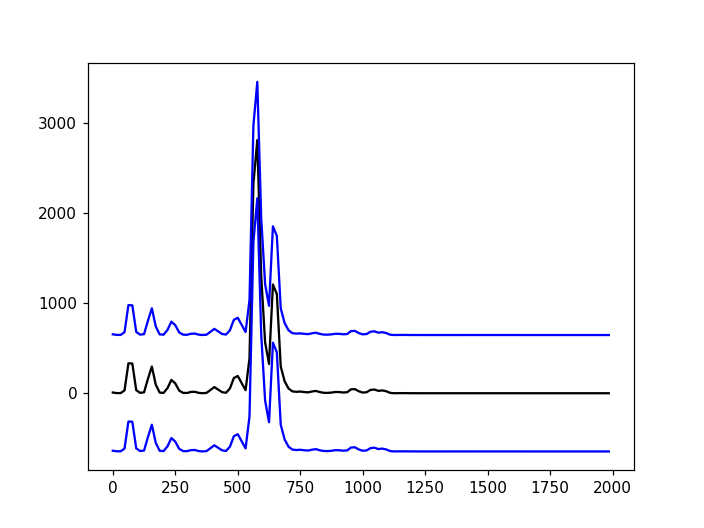

In [31]:
fig = plt.figure()
#plt.subplots(nrows=1,ncols=1)
plt.plot(fm,np.mean(Sm[:,a_m+1],axis=1),color='k')# REVISAR
plt.plot(fm,np.mean(Sm[:,a_m+1],axis=1)+np.std(Sm[:,a_m+1]),color='b')# REVISAR
plt.plot(fm,np.mean(Sm[:,a_m+1],axis=1)-np.std(Sm[:,a_m+1]),color='b')

<IPython.core.display.Javascript object>


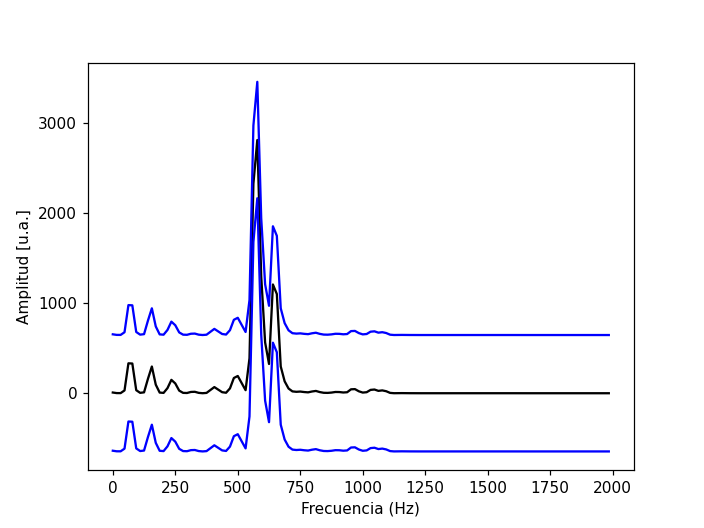

Text(0, 0.5, 'Amplitud [u.a.]')

In [34]:
fig = plt.figure()
#plt.subplots(nrows=1,ncols=1)
plt.plot(fm,np.mean(Sm[:,a_m+1],axis=1),color='k')# REVISAR
plt.plot(fm,np.mean(Sm[:,a_m+1],axis=1)+np.std(Sm[:,a_m+1]),color='b')# REVISAR
plt.plot(fm,np.mean(Sm[:,a_m+1],axis=1)-np.std(Sm[:,a_m+1]),color='b')
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud [u.a.]")

<IPython.core.display.Javascript object>


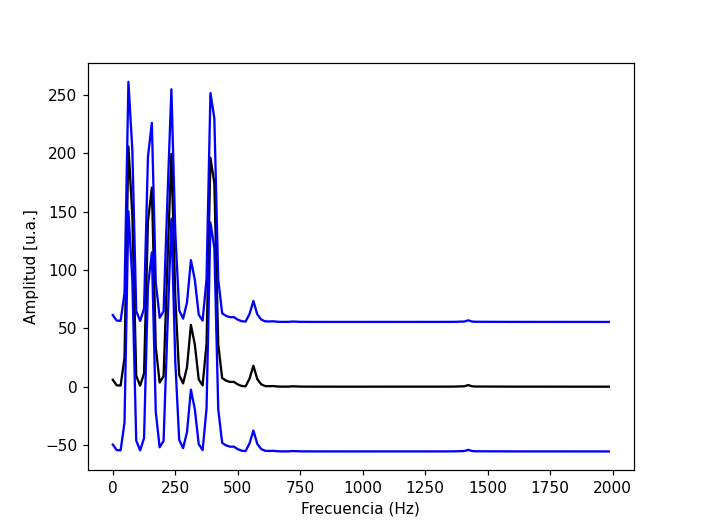

Text(0, 0.5, 'Amplitud [u.a.]')

In [35]:
fig = plt.figure()
#plt.subplots(nrows=1,ncols=1)
plt.plot(fm,np.mean(Sm[:,e_m+1],axis=1),color='k')# REVISAR
plt.plot(fm,np.mean(Sm[:,e_m+1],axis=1)+np.std(Sm[:,e_m+1]),color='b')# REVISAR
plt.plot(fm,np.mean(Sm[:,e_m+1],axis=1)-np.std(Sm[:,e_m+1]),color='b')
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud [u.a.]")

<IPython.core.display.Javascript object>


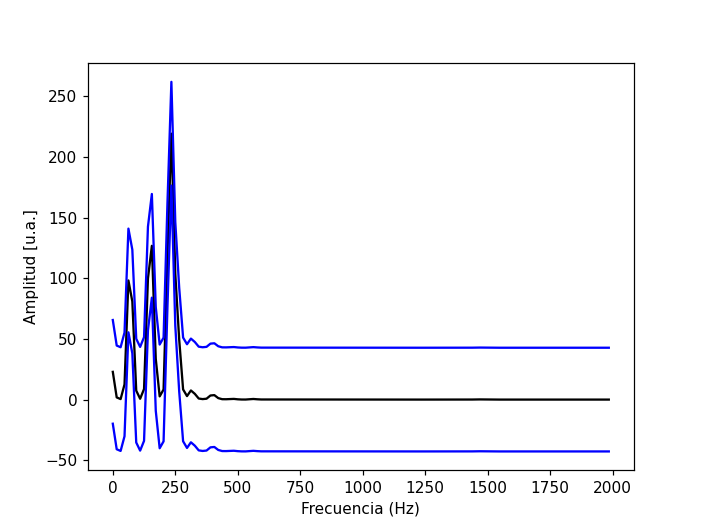

Text(0, 0.5, 'Amplitud [u.a.]')

In [36]:
fig = plt.figure()
#plt.subplots(nrows=1,ncols=1)
plt.plot(fm,np.mean(Sm[:,i_m+1],axis=1),color='k')# REVISAR
plt.plot(fm,np.mean(Sm[:,i_m+1],axis=1)+np.std(Sm[:,i_m+1]),color='b')# REVISAR
plt.plot(fm,np.mean(Sm[:,i_m+1],axis=1)-np.std(Sm[:,i_m+1]),color='b')
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud [u.a.]")

<IPython.core.display.Javascript object>


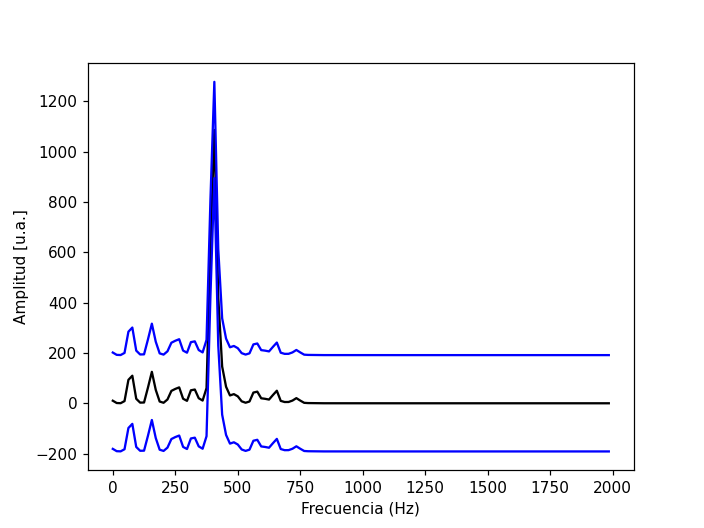

Text(0, 0.5, 'Amplitud [u.a.]')

In [37]:
fig = plt.figure()
#plt.subplots(nrows=1,ncols=1)
plt.plot(fm,np.mean(Sm[:,o_m+1],axis=1),color='k')# REVISAR
plt.plot(fm,np.mean(Sm[:,o_m+1],axis=1)+np.std(Sm[:,o_m+1]),color='b')# REVISAR
plt.plot(fm,np.mean(Sm[:,o_m+1],axis=1)-np.std(Sm[:,o_m+1]),color='b')
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud [u.a.]")

<IPython.core.display.Javascript object>


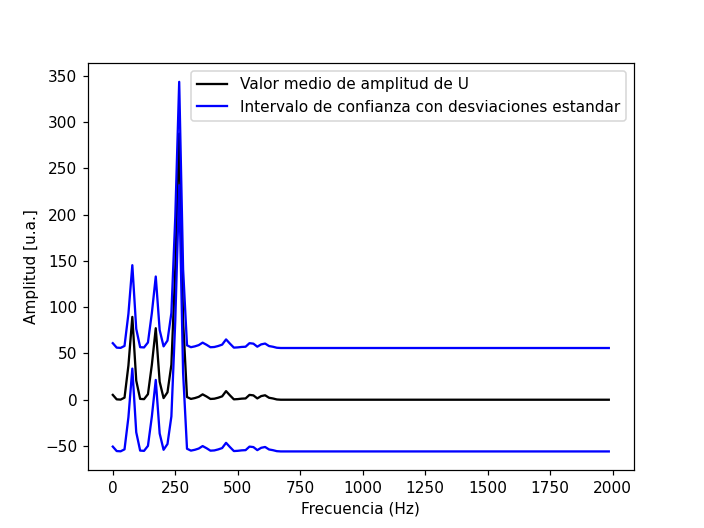

Text(0, 0.5, 'Amplitud [u.a.]')

In [39]:
fig = plt.figure()
#plt.subplots(nrows=1,ncols=1)
plt.plot(fm,np.mean(Sm[:,u_m+1],axis=1),color='k')# REVISAR
plt.plot(fm,np.mean(Sm[:,u_m+1],axis=1)+np.std(Sm[:,u_m+1]),color='b')# REVISAR
plt.plot(fm,np.mean(Sm[:,u_m+1],axis=1)-np.std(Sm[:,u_m+1]),color='b')
plt.legend(["Valor medio de amplitud","Intervalo de confianza con desviaciones estandar"])
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud [u.a.]")
plt.title("Amplitud de vocal U en función de frecuencia")